In [1]:
import torch
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torchvision.models import ResNet34_Weights
import numpy as np
import torchvision.transforms as transforms        
from torch.utils.data import DataLoader
from torch.utils.data import Subset
from src.temperature_scaling import ModelWithTemperature
from src.imagenet_real import aps_imagenet_real_hist, raps_imagenet_real_hist, saps_imagenet_real_hist, aps_imagenet_real_scatter, raps_imagenet_real_scatter, saps_imagenet_real_scatter

#  Preprocess
data_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
])

sorted_val_path = "D:\\Download\\ImageNet-1K\\Validation_Set\\sorted_ImageNet_val"
dataset = ImageFolder(root=sorted_val_path, transform=data_transform)

# load pre-trained model 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet34(weights=ResNet34_Weights.IMAGENET1K_V1).to(device)


# Temperature Scaling
subset_size = len(dataset) // 10
indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_dataset = Subset(dataset, indices)
train_loader = DataLoader(subset_dataset, batch_size=32, shuffle=False, num_workers=2)
model = ModelWithTemperature(model, temperature = 1.2).to(device)
model.set_temperature(train_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.2

Before temperature - NLL: 1.146, ECE: 0.020
Optimal temperature: 1.122
After temperature - NLL: 1.155, ECE: 0.037


APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7981 ± 0.0016
Final Average Prediction Set Size: 6.20 ± 0.11
Final Average Coverage: 0.8006 ± 0.0038
Final Average Real Probability: 0.6916 ± 0.0039


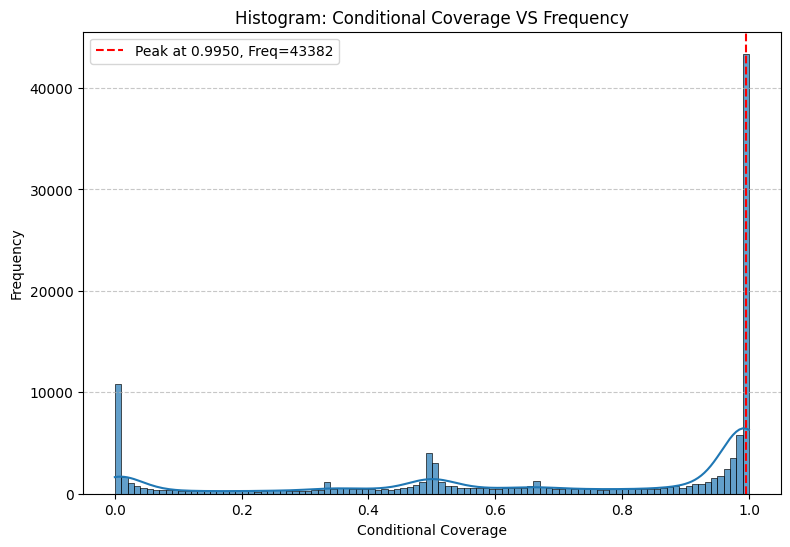

43382 (34.88%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_imagenet_real_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8078 ± 0.0017
Final Average Prediction Set Size: 3.74 ± 0.03
Final Average Coverage: 0.8006 ± 0.0037
Final Average Real Probability: 0.6811 ± 0.0036


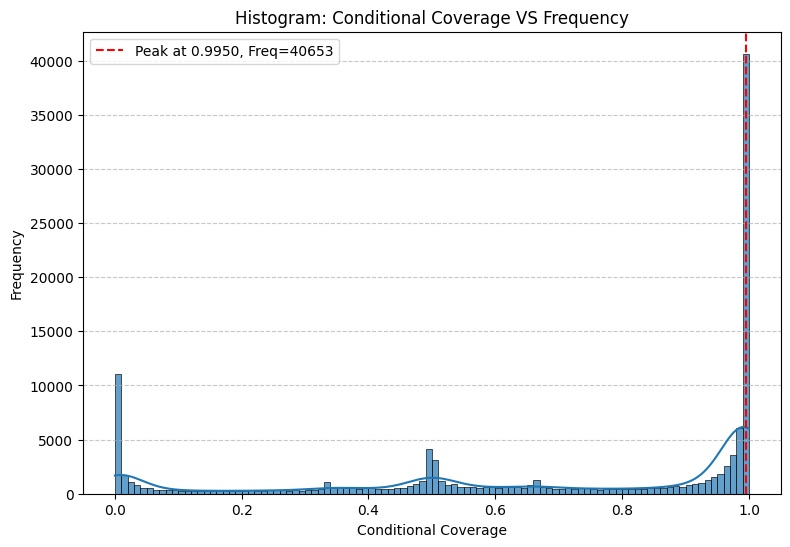

40653 (32.69%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_imagenet_real_hist(model, dataset, device, lambda_=0.01, k_reg=9, num_runs=10, alpha=0.2, is_ground_truth=False)

SAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8025 ± 0.0035
Final Average Prediction Set Size: 2.47 ± 0.02
Final Average Coverage: 0.8000 ± 0.0041
Final Average Real Probability: 0.6799 ± 0.0028


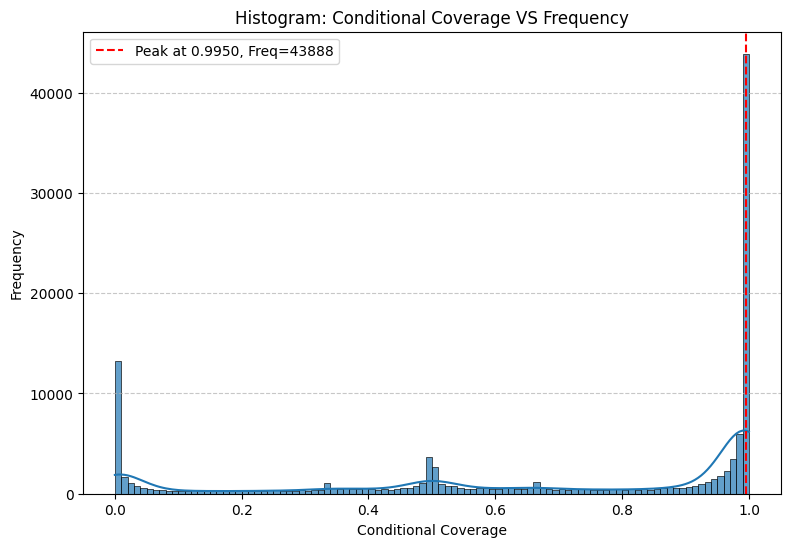

43888 (35.29%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_imagenet_real_hist(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2, is_ground_truth=False)

APS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7981 ± 0.0016
Final Average Prediction Set Size: 6.20 ± 0.11
Final Average Coverage: 0.8006 ± 0.0038
Final Average Real Probability: 0.6916 ± 0.0039


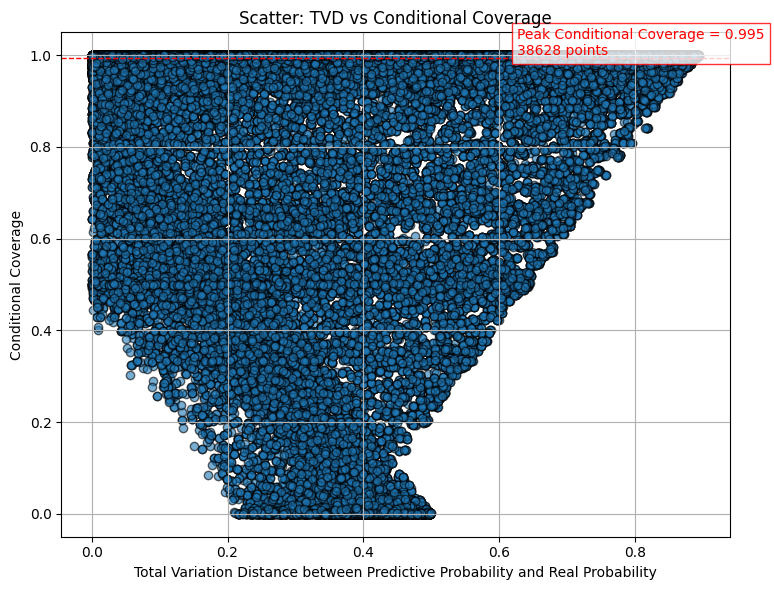

Peak Conditional Coverage = 0.995, with 38628 samples

=== Count Regions Summary ===
37501 (30.2%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
25891 (20.8%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
48328 (38.9%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93882']
  Real Probability Set      : ['0.99873']
Sample 2:
  Predictive Probability Set: ['0.83433']
  Real Probability Set      : ['0.99062']
Sample 3:
  Predictive Probability Set: ['0.97471']
  Real Probability Set      : ['0.87162']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.50883', '0.08169', '0.04181', '0.03945', '0.03243', '0.03150', '0.02906', '0.01858', '0.01347']
  Real Probability Set      : ['0.00036', '0.00000', '0.00036', '0.00220', '0.00036', '0.00031', '0.00036', '0.00000', '0.00222']
Sample 2:
  Predictive Probability Set: ['0.83994']
 

In [5]:
aps_imagenet_real_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on ImageNet Real (alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8078 ± 0.0017
Final Average Prediction Set Size: 3.74 ± 0.03
Final Average Coverage: 0.8006 ± 0.0037
Final Average Real Probability: 0.6811 ± 0.0036


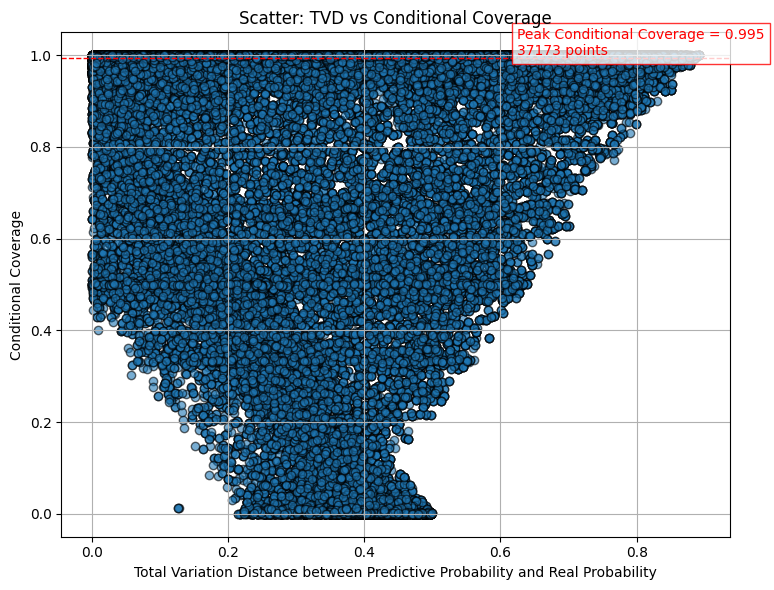

Peak Conditional Coverage = 0.995, with 37173 samples

=== Count Regions Summary ===
38381 (30.9%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
24271 (19.5%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
50768 (40.8%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83241']
  Real Probability Set      : ['0.99949']
Sample 2:
  Predictive Probability Set: ['0.81443']
  Real Probability Set      : ['0.99666']
Sample 3:
  Predictive Probability Set: ['0.92394']
  Real Probability Set      : ['0.96909']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.68490', '0.07047']
  Real Probability Set      : ['0.00012', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.83209']
  Real Probability Set      : ['0.00106']
Sample 3:
  Predictive Probability Set: ['0.97034']
  Real Probability Set      : ['0.00342']

--- Region 3: medi

In [6]:
raps_imagenet_real_scatter(model, dataset, device, lambda_=0.01, k_reg=9, num_runs=10, alpha=0.2)

SAPS Classification on CIFAR10-H(alpha=0.2), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8025 ± 0.0035
Final Average Prediction Set Size: 2.47 ± 0.02
Final Average Coverage: 0.8000 ± 0.0041
Final Average Real Probability: 0.6799 ± 0.0028


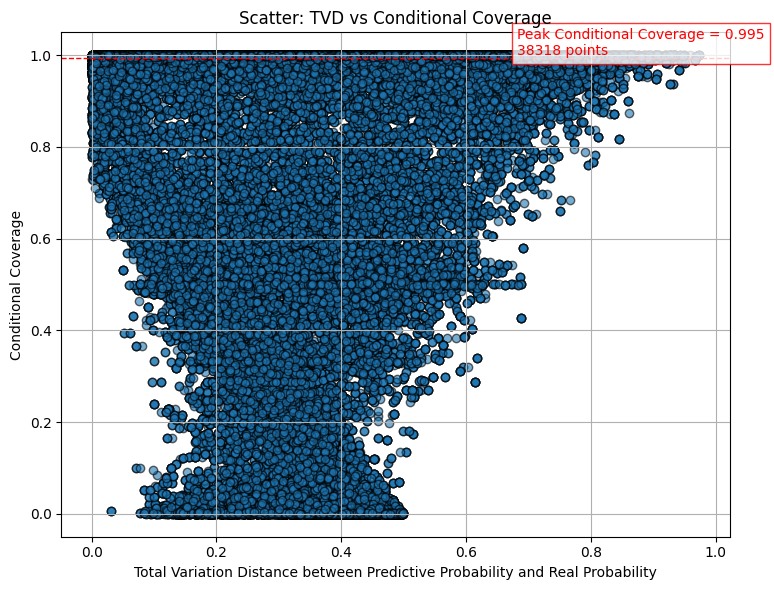

Peak Conditional Coverage = 0.995, with 38318 samples

=== Count Regions Summary ===
41408 (33.3%) samples in Count Region 1 [x:0-0.5, y:0.8-1.0]
21465 (17.3%) samples in Count Region 2 [x:0.5-1.0, y:0.8-1.0]
51129 (41.1%) samples in Count Region 3 [x:0-0.5, y:0-0.8]

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80792']
  Real Probability Set      : ['0.87219']
Sample 2:
  Predictive Probability Set: ['0.98769']
  Real Probability Set      : ['0.99924']
Sample 3:
  Predictive Probability Set: ['0.99630']
  Real Probability Set      : ['0.99918']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.84381']
  Real Probability Set      : ['0.04631']
Sample 2:
  Predictive Probability Set: ['0.87963']
  Real Probability Set      : ['0.00065']
Sample 3:
  Predictive Probability Set: ['0.15432', '0.06767', '0.04912', '0.04660', '0.03496', '0.03188', '0.02631']
  Real Probabilit

In [8]:
saps_imagenet_real_scatter(model, dataset, device, lambda_=0.1, num_runs=10, alpha=0.2)